# CS145: Project 3 | Project Name

## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Zainab Rizwan, 2019-CE-36*

## Project Overview

---

The world_bank_intl_education dataset is a part of the bigquery public dataset collection. This dataset combines key education statistics from a variety of sources to provide a look at global literacy, spending and access. It also provides information regarding the total population getting education on primary, secondary and higher-levels w.r.t age and gender.
The goal of this project is to answer the proposed questions aforementioned.

---


## Analysis of Dataset

---

**1.    country_series_definitions**

      Table size:  44.78 KB
      Number of rows: 613
      This table defines the series code of every country along with a short description.
**2.    country_summary**

      Table size:  124.25 KB
      Number of rows: 241
      This table contains basic details of countries such as the country code, name, currency, region etc.
**3.    international_education**

      Table size:  595.93 MB
      Number of rows: 5082201
      This table provides information regarding the literacy level of each country with the use of indicators.
**4.    series_summary**

      Table size:  3.36 MB
      Number of rows: 3665
      This table describes the indicators by specifying their names, codes, definitions, source, measurement unit and more.

----

## Is there redundant data?

Yes. The country_series_defintions, country_summary and series_summary tables contain little to no repetitions. But there is serious data redundancy in the international_education table.

## What are the relationships between tables? 
Table relations have been described in the ER diagram.

## Functional Dependencies
1. **country_series_definitions**

    *series_code* → description
2. **country_summary**
    
    *country_code* → short_name, table_name, long_name, two_alpha_code, currency_unit, special_notes, region, income_group, wb_two_code, national_accounts_base_year, national_accounts_reference_year, sna_price_valuation, lending_category, other_groups, system_of_national_accounts, alternative_conversion_factor, ppp_survey_year, balance_of_payments_manual_in_use, external_debt_reporting_status, system_of_trade, government_accounting_concept, imf_data_dissemination_standard, latest_population_census, latest_household_survey, source_of_most_recent_income_and_expenditure_data, vital_registration_complete, latest_agricultural_census, latest_industrial_data, latest_trade_data, latest_water_withdrawal_data
3. **international_education**

    *country_code*  → country_name

    *indicator_code*→ indicator_name
4. **series_summary**
    
   *series_code* → topic, indicator_name, short_definition, long_definition, unit_of_measure, periodicity, base_period, other_notes, aggregation_method, limitations_and_exceptions, notes_from_original_source, general_comments, source, statistical_concept_and_methodology, development_relevance, related_source_links, other_web_links, related_indicators, license_type
 
## Table keys
1. **country_series_definitions**

    Composite keys: country_code,  series_code

    SELECT 
      country_code, series_code, COUNT(*) as x 
    
    FROM 
      `bigquery-public-data.world_bank_intl_education.country_series_definitions` 
   
    GROUP BY 
      country_code, series_code
    HAVING 
      x>1

  Foreign key: series_code
2. **country_summary**

    Primary key: country_code
3. **international_education**

    Composite keys: country_code, indicator_code, year
    SELECT  
      country_code, indicator_code, year, COUNT(*) AS x

    FROM `bigquery-public-data.world_bank_intl_education.international_education`

    GROUP BY country_code, indicator_code, year HAVING x>1
    Foreign key:  country_code, indicator_code
4. **series_summary**

    Primary key: series_code
 
## Why do you think the original authors of the dataset chose this particular structure? 
The authors of this dataset chose this particular structure as it was the most efficient, logical and normalised design.



## ER Diagram
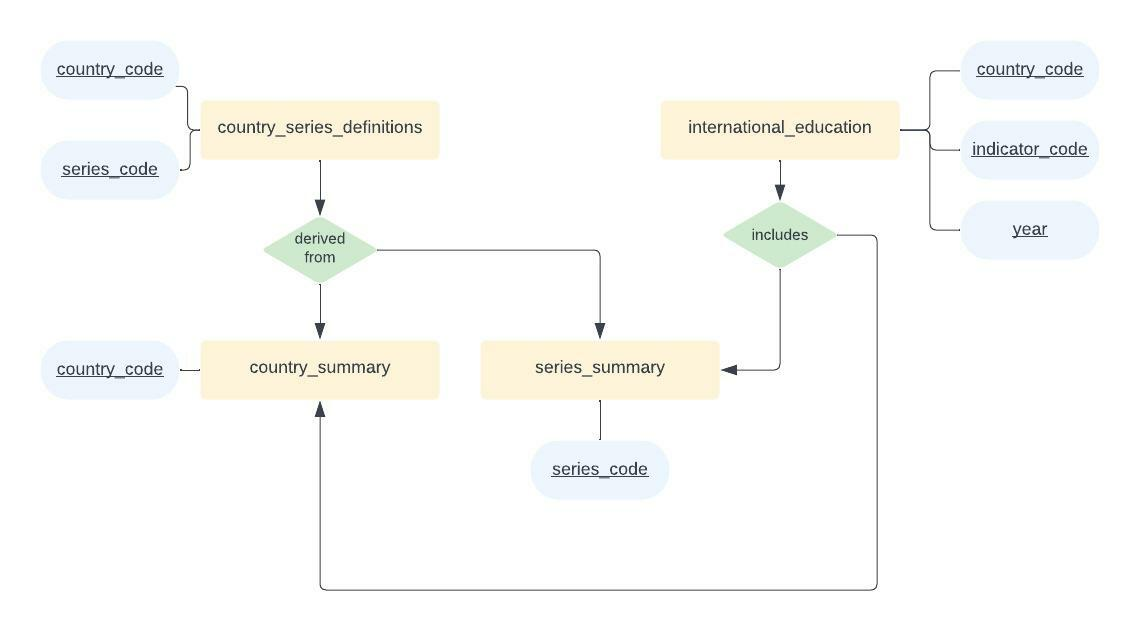

## Data Exploration

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "project3-345403"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

data_ref = client.dataset("world_bank_intl_education", project="bigquery-public-data")
data = client.get_dataset(data_ref)

tables = list(client.list_tables(data))
for table in tables:
    print(table.table_id)

country_series_definitions
country_summary
international_education
series_summary


## Checking schema for the international_education table

In [ ]:
client.get_table(data_ref.table("international_education")).schema

[SchemaField('country_name', 'STRING', 'NULLABLE', '', ()),
 SchemaField('country_code', 'STRING', 'NULLABLE', '', ()),
 SchemaField('indicator_name', 'STRING', 'NULLABLE', '', ()),
 SchemaField('indicator_code', 'STRING', 'NULLABLE', '', ()),
 SchemaField('value', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('year', 'INTEGER', 'NULLABLE', '', ())]

## Sneak peak of the international_education table

In [ ]:
table_ref = data_ref.table("international_education")
table = client.get_table(table_ref)
client.list_rows(table, max_results=10).to_dataframe()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Canada,CAN,"Population, ages 0-14, total",SP.POP.0014.TO,5.795256e+06,2016
1,Central African Republic,CAF,Official entrance age to lower secondary educa...,SE.SEC.AGES,1.200000e+01,2016
2,Central African Republic,CAF,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.000000e+00,2016
3,Chad,TCD,"Illiterate population, 25-64 years, male (number)",UIS.ILLPOP.AG25T64.M,1.530592e+06,2016
4,China,CHN,"Population, female",SP.POP.TOTL.FE.IN,6.682916e+08,2016
5,Nigeria,NGA,Theoretical duration of pre-primary education ...,UIS.THDUR.0,1.000000e+00,2016
6,Oman,OMN,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.004730e+00,2016
7,Papua New Guinea,PNG,Population of the official age for pre-primary...,SP.PRE.TOTL.MA.IN,3.070120e+05,2016
8,Papua New Guinea,PNG,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1.F,8.530700e+04,2016
9,Turkmenistan,TKM,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,4.195031e+01,2016


In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#F5F5F5'
%matplotlib inline

---

*TODO: Exploring your questions, with appropriate visualizations*

**1. Percentage of government spending spent on education**

    SELECT
      country_name, AVG(value) AS average
    FROM
      `bigquery-public-data.world_bank_intl_education.international_education` 
    WHERE
      indicator_code = "SE.XPD.TOTL.GB.ZS"
      AND year > 2000
    GROUP BY
      country_name
    ORDER BY
      average DESC

---

## **What is the average percentage of government spending spent on education in each country**

In [93]:
%%bigquery --project $project_id 

SELECT
  country_name,
  AVG(value) AS average,
  income_group,
  region
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year > 2000
GROUP BY
  country_name, income_group, region
ORDER BY
  average DESC

,country_name,average,income_group,region
0,Vanuatu,29.330663,Lower middle income,East Asia & Pacific
1,Lesotho,27.614941,Lower middle income,Sub-Saharan Africa
2,Tunisia,25.615756,Upper middle income,Middle East & North Africa
3,Ethiopia,24.280294,Low income,Sub-Saharan Africa
4,Botswana,24.269573,Upper middle income,Sub-Saharan Africa
...,...,...,...,...
169,Zambia,7.548607,Lower middle income,Sub-Saharan Africa
170,Lebanon,7.015822,Upper middle income,Middle East & North Africa
171,Monaco,6.844026,High income: nonOECD,Europe & Central Asia
172,Eritrea,5.601227,Low income,Sub-Saharan Africa


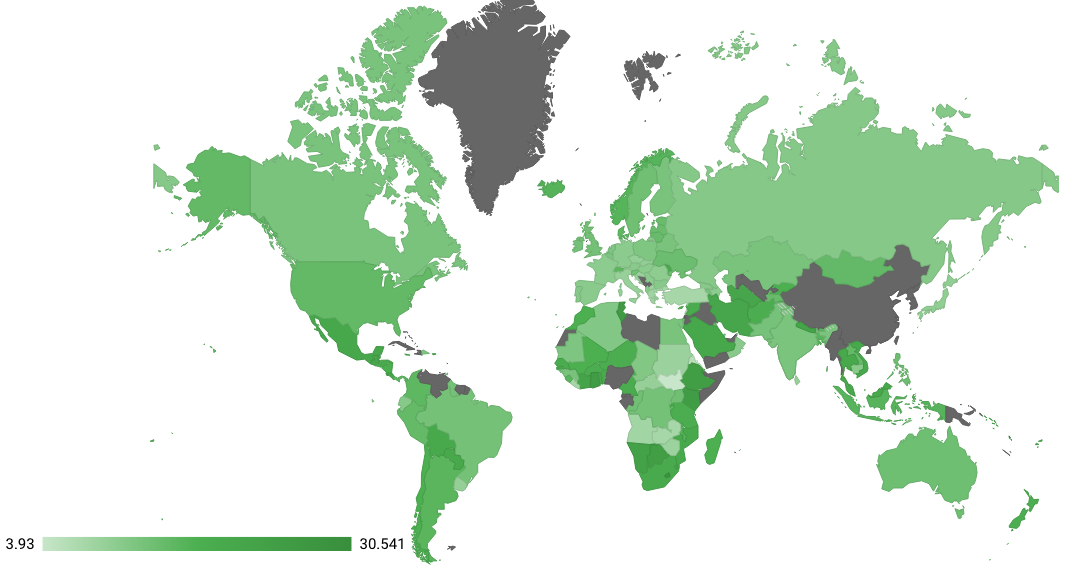

In [97]:
%%bigquery --project $project_id 

SELECT
  country_name,
  AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`

WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year > 2000
GROUP BY
  country_name
ORDER BY
  average DESC

,country_name,average
0,Vanuatu,29.330663
1,Lesotho,27.614941
2,Tunisia,25.615756
3,Ethiopia,24.280294
4,Botswana,24.269573
...,...,...
169,Zambia,7.548607
170,Lebanon,7.015822
171,Monaco,6.844026
172,Eritrea,5.601227


## **Which countries have the highest and lowest average percentage of spending on education**

In [ ]:
%%bigquery --project $project_id

SELECT
  country_name,
  AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year > 2000
GROUP BY
  country_name
ORDER BY
  average DESC
LIMIT 1;

,country_name,average
0,Vanuatu,29.330663


In [ ]:
%%bigquery --project $project_id 

SELECT
  country_name,
  AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year > 2000
GROUP BY
  country_name
ORDER BY
  average 
LIMIT 1;

,country_name,average
0,South Sudan,3.482285



## **What is the average percentage of government spending spent on education through the years**

In [104]:
%%bigquery --project $project_id 

SELECT
  year, AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
GROUP BY
  year
ORDER BY
  year 



,year,average
0,1980,8.780760
1,1981,12.714299
2,1982,12.115268
3,1983,13.113828
4,1984,13.070579
5,1985,13.863691
6,1986,14.388879
7,1987,11.679330
8,1988,12.920194
9,1989,13.276553


###Engineering feature: Standard deviation
z = (x - u) / s

Where z is the new value, x is the original value, u is the mean and s is the standard deviation.

In [128]:
sql = """
    SELECT
  year, AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
GROUP BY
  year
ORDER BY
  year 

"""

df = client.query(sql).to_dataframe()

In [129]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['year', 'average']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.68458833 -3.76075918]
 [-1.58832614 -0.97853611]
 [-1.49206395 -1.40223514]
 [-1.39580176 -0.69594581]
 [-1.29953957 -0.72653661]
 [-1.20327738 -0.16556223]
 [-1.10701519  0.20590748]
 [-1.010753   -1.71057746]
 [-0.91449081 -0.83290509]
 [-0.81822862 -0.58084893]
 [-0.72196643 -1.32436498]
 [-0.62570424 -0.9117985 ]
 [-0.52944205 -0.51555381]
 [-0.43317986 -0.10398312]
 [-0.33691767  0.77879154]
 [-0.24065548  0.52585021]
 [-0.14439329  0.17311574]
 [-0.0481311   0.26480196]
 [ 0.0481311  -0.33068968]
 [ 0.14439329  0.79066875]
 [ 0.24065548  0.55039606]
 [ 0.33691767  1.01201807]
 [ 0.43317986  0.72739192]
 [ 0.52944205  1.16616485]
 [ 0.62570424  0.416128  ]
 [ 0.72196643  0.67461718]
 [ 0.81822862  0.65338478]
 [ 0.91449081  0.65634037]
 [ 1.010753    0.89444071]
 [ 1.10701519  0.52957063]
 [ 1.20327738  0.43950402]
 [ 1.29953957  0.30913068]
 [ 1.39580176  0.61522616]
 [ 1.49206395  0.62123916]
 [ 1.58832614  0.56695726]
 [ 1.68458833  1.46865112]]


Text(0, 0.5, 'Year')

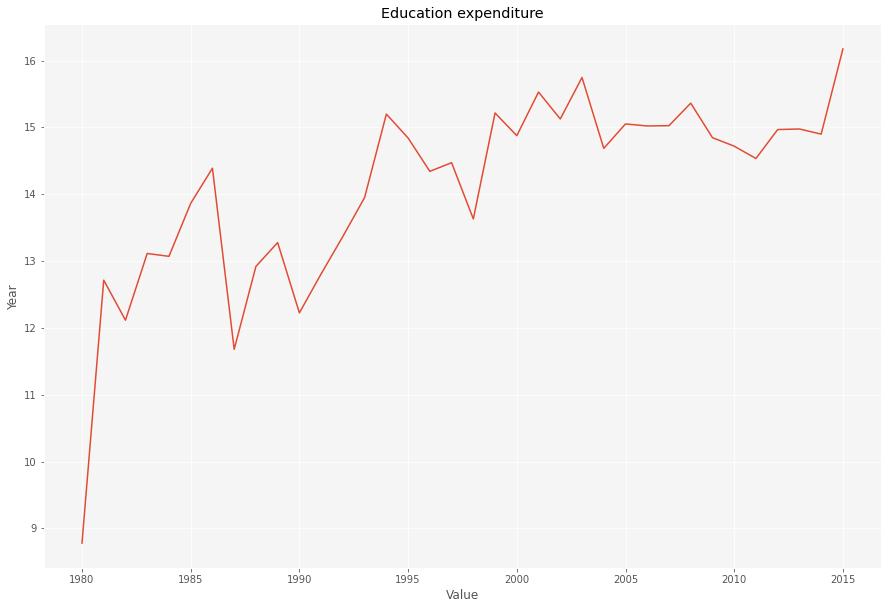

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(a["year"], a["average"])
plt.title("Education expenditure")
plt.xlabel("Value")
plt.ylabel("Year")

## **What is the average percentage of government spending spent on education after the year 2000**

In [ ]:
%%bigquery --project $project_id 

SELECT
  year, AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year>2000
GROUP BY
  year
ORDER BY
  year 

,year,average
0,2001,15.528567
1,2002,15.126159
2,2003,15.746502
3,2004,14.686091
4,2005,15.051546
5,2006,15.021527
6,2007,15.025706
7,2008,15.362335
8,2009,14.846477
9,2010,14.719140


## **What is the average percentage of government spending spent on education before the year 2000**

In [ ]:
%%bigquery --project $project_id 

SELECT
  year, AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year<2000
GROUP BY
  year
ORDER BY
  year 

,year,average
0,1980,8.780760
1,1981,12.714299
2,1982,12.115268
3,1983,13.113828
4,1984,13.070579
5,1985,13.863691
6,1986,14.388879
7,1987,11.679330
8,1988,12.920194
9,1989,13.276553


In [ ]:
%%bigquery --project $project_id b11

SELECT
  year, AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year<=2000
GROUP BY
  year
ORDER BY
  year 

In [ ]:
%%bigquery --project $project_id b12

SELECT
  year, AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year>=2000
GROUP BY
  year
ORDER BY
  year 

Text(0, 0.5, 'Value')

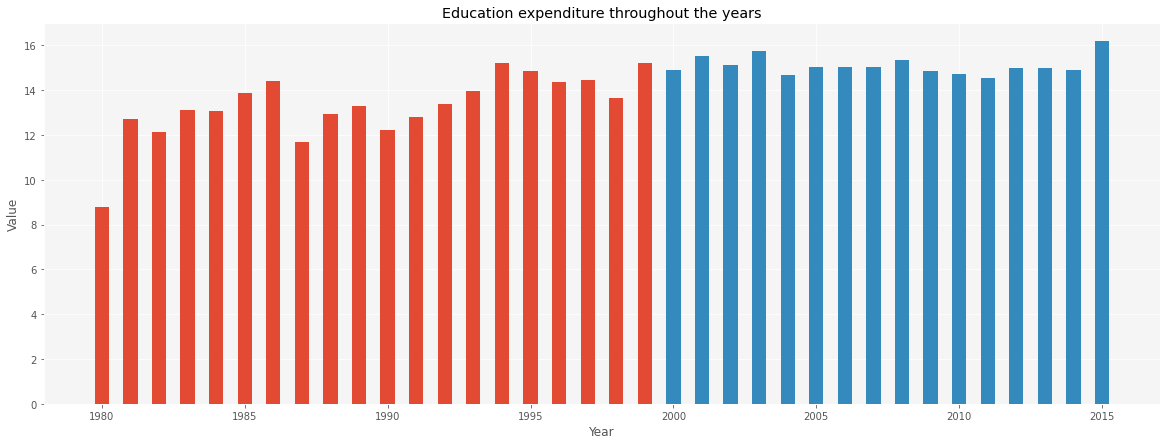

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(b11["year"], b11["average"], width=0.5)
plt.title("Education expenditure throughout the years")
plt.xlabel("Year")
plt.ylabel("Value")

plt.bar(b12["year"], b12["average"], width=0.5)
plt.title("Education expenditure throughout the years")
plt.xlabel("Year")
plt.ylabel("Value")

In [ ]:
%%bigquery --project $project_id b1

SELECT
  AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year>=2000


In [ ]:
%%bigquery --project $project_id b2

SELECT
  AVG(value) AS average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education`
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND year<=2000


Text(0, 0.5, 'Value')

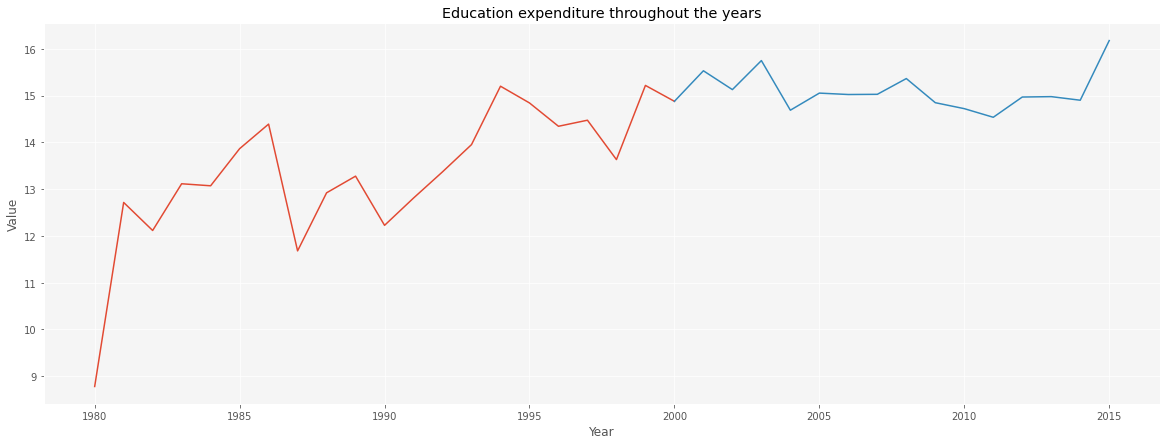

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(b11["year"], b11["average"])
plt.title("Education expenditure throughout the years")
plt.xlabel("Year")
plt.ylabel("Value")

plt.plot(b12["year"], b12["average"])
plt.title("Education expenditure throughout the years")
plt.xlabel("Year")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

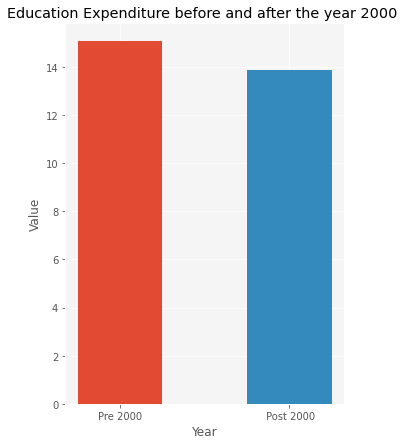

In [ ]:
plt.figure(figsize=(5, 7))

plt.bar('Pre 2000',b1["average"], width=0.5)
plt.title("Education expenditure by Region")
plt.xlabel("Region")
plt.ylabel("Value")


plt.bar(' Post 2000',b2["average"], width=0.5)
plt.title("Education Expenditure before and after the year 2000 ")
plt.xlabel("Year")
plt.ylabel("Value")



## **What is the average percentage of government spending spent on education on the basis of regions**

In [ ]:
%%bigquery --project $project_id 

SELECT
  AVG(value) AS average, region
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
GROUP BY
  region
ORDER BY
  average

,average,region
0,12.145135,Europe & Central Asia
1,13.246842,North America
2,14.095748,South Asia
3,15.662550,Middle East & North Africa
4,15.734265,East Asia & Pacific
5,16.401660,Latin America & Caribbean
6,16.704192,Sub-Saharan Africa


In [ ]:
%%bigquery --project $project_id c

SELECT
  AVG(value) AS average, region
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
GROUP BY
  region


Text(0, 0.5, 'Value')

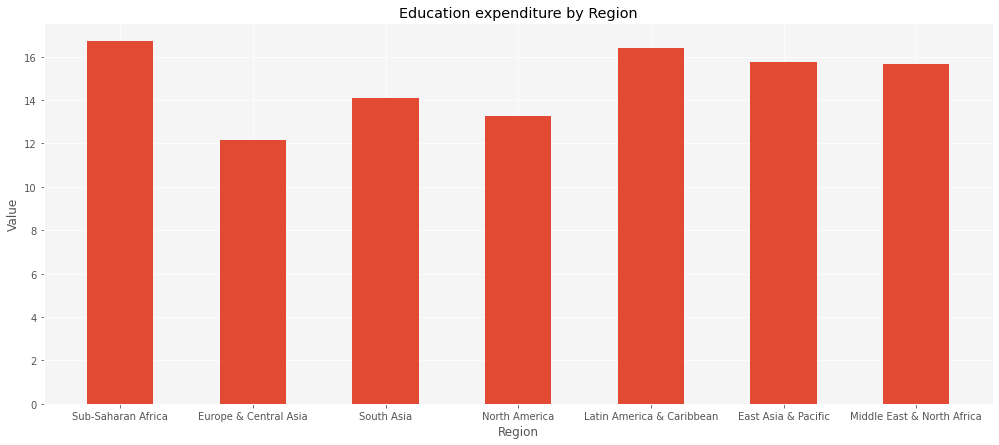

In [ ]:
plt.figure(figsize=(17, 7))
plt.bar(c["region"], c["average"], width=0.5)
plt.title("Education expenditure by Region")
plt.xlabel("Region")
plt.ylabel("Value")

## **What is the average government spending on education in South Asia throughout the years**

In [ ]:
%%bigquery --project $project_id 

SELECT
  AVG(value) as average, year
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
GROUP BY
  year
ORDER BY 
  year 

,average,year
0,5.263600,1980
1,6.634030,1981
2,6.394110,1982
3,6.473260,1983
4,8.087620,1984
5,8.388630,1985
6,9.130050,1986
7,10.468430,1987
8,11.191030,1990
9,10.969165,1991


In [ ]:
%%bigquery --project $project_id d

SELECT
  AVG(value) as average, year
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
GROUP BY
  year
ORDER BY 
  year 

Text(0, 0.5, 'Value')

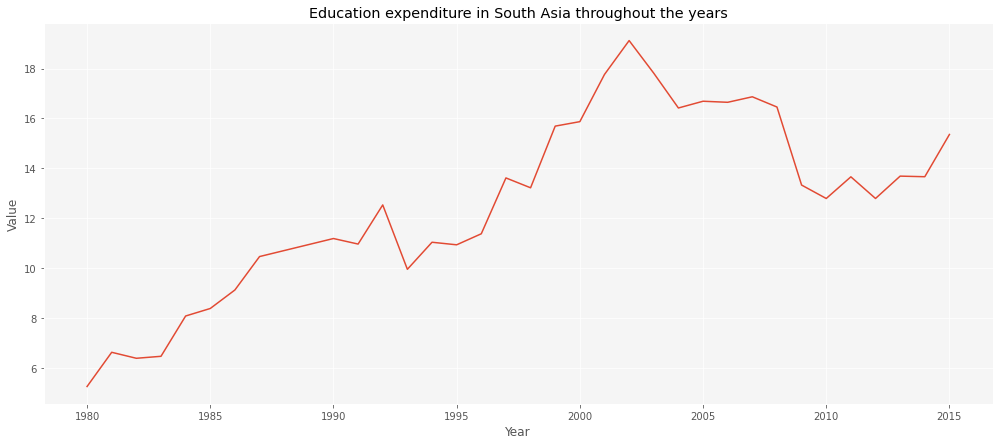

In [ ]:
plt.figure(figsize=(17, 7))
plt.plot(d["year"], d["average"])
plt.title("Education expenditure in South Asia throughout the years")
plt.xlabel("Year")
plt.ylabel("Value")

## **Education expenditure trends in South Asian Countries**

In [ ]:
%%bigquery --project $project_id 

SELECT
  country_name, AVG(value) as average, 	source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
GROUP BY
  country_name, 	source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  average


,country_name,average,source_of_most_recent_income_and_expenditure_data,income_group
0,Sri Lanka,10.411602,"Expenditure survey/budget survey (ES/BS), 2010",Lower middle income
1,Pakistan,11.612992,"Integrated household survey (IHS), 2008",Lower middle income
2,Bangladesh,13.154608,"Integrated household survey (IHS), 2010",Low income
3,India,13.538788,"Integrated household survey (IHS), 2012",Lower middle income
4,Afghanistan,14.091753,"Integrated household survey (IHS), 2008",Low income
5,Maldives,14.367798,"Integrated household survey (IHS), 2010",Upper middle income
6,Bhutan,16.359389,"Integrated household survey (IHS), 2012",Lower middle income
7,Nepal,19.996214,Living Standards Measurement Study Survey (LSM...,Low income


In [ ]:
%%bigquery --project $project_id e1

SELECT
  country_name, AVG(value) as average
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
GROUP BY
  country_name


Text(0, 0.5, 'Value')

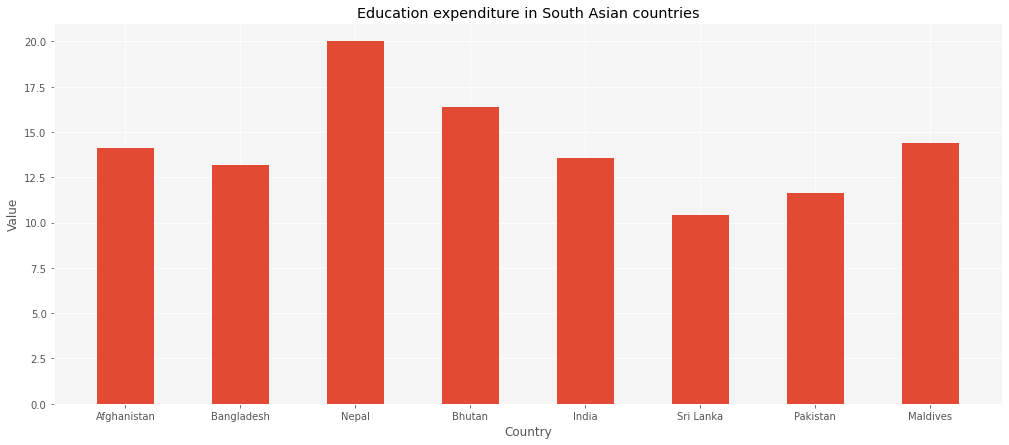

In [ ]:
plt.figure(figsize=(17, 7))
plt.bar(e1["country_name"], e1["average"], width=0.5)
plt.title("Education expenditure in South Asian countries")
plt.xlabel("Country")
plt.ylabel("Value")

###A Comparison of education expenditure in India, Pakistan and Bangladesh throughout the years

In [ ]:
%%bigquery --project $project_id f
SELECT
  AVG(value) as average, country_name, year
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND country_name LIKE '%India%'
GROUP BY
  country_name, year
ORDER BY
  year

In [ ]:
%%bigquery --project $project_id f1

SELECT
  AVG(value) as average, country_name, year
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND country_name LIKE '%Pakistan%'
GROUP BY
  country_name, year
ORDER BY
  year

In [ ]:
%%bigquery --project $project_id f2

SELECT
  AVG(value) as average, country_name, year
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND country_name LIKE '%Bangladesh%'
GROUP BY
  country_name, year
ORDER BY
  year

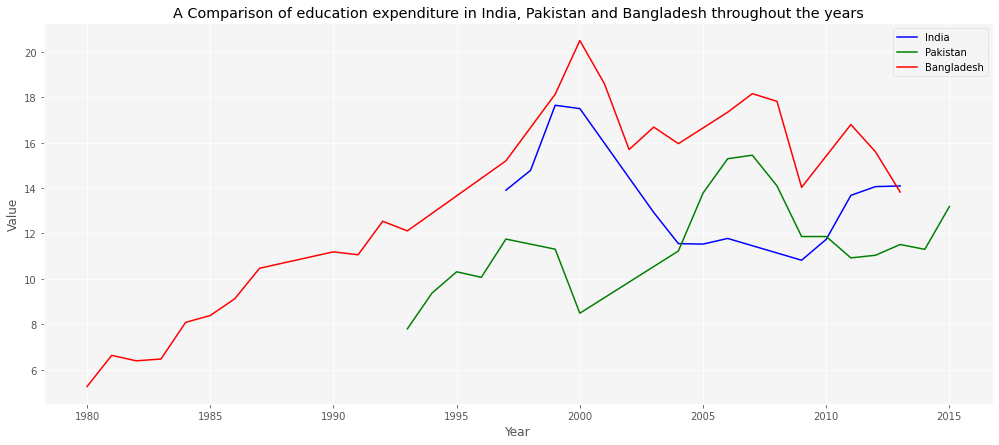

In [ ]:
plt.figure(figsize=(17, 7))
plt.plot(f["year"], f["average"],'b', label='India')
plt.plot(f1["year"], f1["average"],'g', label='Pakistan')
plt.plot(f2["year"], f2["average"],'r', label='Bangladesh')
plt.title("A Comparison of education expenditure in India, Pakistan and Bangladesh throughout the years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()


####A comparison with previous years

In [ ]:
%%bigquery --project $project_id

SELECT
  AVG(value) as average, LAG(AVG(value)) OVER(order by YEAR) as previous_average, year
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND country_name='Pakistan'
GROUP BY
  country_name, year
ORDER BY
  year

,average,previous_average,year
0,7.80285,NaN,1993
1,9.37643,7.80285,1994
2,10.31327,9.37643,1995
3,10.06899,10.31327,1996
4,11.75340,10.06899,1997
5,11.30733,11.75340,1999
6,8.48988,11.30733,2000
7,11.22935,8.48988,2004
8,13.77751,11.22935,2005
9,15.28910,13.77751,2006


In [ ]:
%%bigquery --project $project_id g

SELECT
  AVG(value) as average, LAG(AVG(value)) OVER(order by YEAR) as previous_average, year
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND country_name='Pakistan'
GROUP BY
  country_name, year
ORDER BY
  year

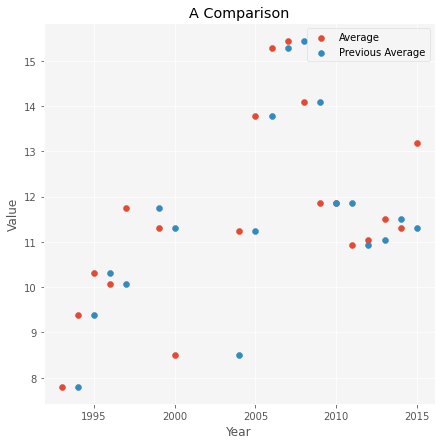

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(g["year"], g["average"], label='Average')
plt.scatter(g["year"], g["previous_average"], label='Previous Average')
plt.title("A Comparison")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

## Data Prediction

### Connecting to the project

In [ ]:
PROJECT_ID = 'project3-345403'
from google.cloud import bigquery

client = bigquery.Client(project=PROJECT_ID, location="US")
dataset = client.create_dataset('model_dataset', exists_ok=True)

from google.cloud.bigquery import magics

###Training Data


I will use data prior to the year 2000 to train the model, and use data after the year 2000 as testing data.

In [ ]:
%%bigquery --project $project_id 

SELECT
  AVG(value) as average, country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND year<2000
GROUP BY
  country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  year



,average,country_name,year,source_of_most_recent_income_and_expenditure_data,income_group
0,5.263600,Bangladesh,1980,"Integrated household survey (IHS), 2010",Low income
1,6.634030,Bangladesh,1981,"Integrated household survey (IHS), 2010",Low income
2,6.394110,Bangladesh,1982,"Integrated household survey (IHS), 2010",Low income
3,6.473260,Bangladesh,1983,"Integrated household survey (IHS), 2010",Low income
4,8.087620,Bangladesh,1984,"Integrated household survey (IHS), 2010",Low income
5,8.388630,Bangladesh,1985,"Integrated household survey (IHS), 2010",Low income
6,9.130050,Bangladesh,1986,"Integrated household survey (IHS), 2010",Low income
7,10.468430,Bangladesh,1987,"Integrated household survey (IHS), 2010",Low income
8,11.191030,Bangladesh,1990,"Integrated household survey (IHS), 2010",Low income
9,11.062100,Bangladesh,1991,"Integrated household survey (IHS), 2010",Low income


###Looking for anomalies

###Create a model
*   A linear regression model is used
*   Dependent variable is labeled "label" in the query



In [ ]:
%%bigquery --project $project_id 
CREATE OR REPLACE MODEL `model_dataset.bqml_sfbikeshare`
OPTIONS(model_type='linear_reg', OPTIMIZE_STRATEGY='batch_gradient_descent') AS
SELECT
  AVG(value) as label, country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND year<2000
GROUP BY
  country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  year

""


###Evaluating the model
Evaluating the model by using teting data post year 2000

In [ ]:
%%bigquery --project $project_id 
SELECT
  *
FROM ML.EVALUATE(MODEL `model_dataset.bqml_sfbikeshare`, (
SELECT
  AVG(value) as label, country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND year>2000
GROUP BY
  country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  year))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1.771286,5.698343,0.019847,1.451223,0.639005,0.63939


In [ ]:
%%bigquery --project $project_id

SELECT
*
FROM
 ML.TRAINING_INFO(MODEL `model_dataset.bqml_sfbikeshare`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,5,5.698343,None,0.4,2017
1,0,4,5.729577,None,0.4,2201
2,0,3,5.809847,None,0.4,2145
3,0,2,6.029726,None,0.4,2155
4,0,1,7.117667,None,0.2,2230
5,0,0,17.630813,None,0.2,1820


###Predictions

####Overall average value of all countries throughout the years

In [ ]:
%%bigquery --project $project_id 

SELECT
  AVG(ROUND(predicted_label)) AS predicted_average,
  AVG(label) AS actual_average
FROM ML.PREDICT(MODEL `model_dataset.bqml_sfbikeshare`, (
SELECT
  AVG(value) as label, country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND year>2000
GROUP BY
  country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  year))

,predicted_average,actual_average
0,14.928571,15.027507


####A particular country - Pakistan

In [ ]:
%%bigquery --project $project_id 

SELECT
  AVG(ROUND(predicted_label)) AS predicted_average,
  AVG(label) AS actual_average
FROM ML.PREDICT(MODEL `model_dataset.bqml_sfbikeshare`, (
SELECT
  AVG(value) as label, country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND year>2000
  AND country_name="Pakistan"
GROUP BY
  country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  year))

,predicted_average,actual_average
0,12.5,12.627891


####A particular country and year - Pakistan in 2012

In [ ]:
%%bigquery --project $project_id 

SELECT
  AVG(ROUND(predicted_label)) AS predicted_average,
  AVG(label) AS actual_average
FROM ML.PREDICT(MODEL `model_dataset.bqml_sfbikeshare`, (
SELECT
  AVG(value) as label, country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND country_name="Pakistan"
  AND year=2012
GROUP BY
  country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  year))


,predicted_average,actual_average
0,12.0,11.04063


In [ ]:
%%bigquery --project $project_id 

SELECT
  predicted_label,label, country_name
FROM ML.PREDICT(MODEL `model_dataset.bqml_sfbikeshare`, (
SELECT
  AVG(value) as label, country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
FROM
  `bigquery-public-data.world_bank_intl_education.international_education` AS IE
INNER JOIN
   `bigquery-public-data.world_bank_intl_education.country_summary` AS CS
ON
    IE.country_code= CS.country_code
WHERE
  indicator_code = "SE.XPD.TOTL.GB.ZS"
  AND region="South Asia"
  AND year=2000
GROUP BY
  country_name, year, source_of_most_recent_income_and_expenditure_data, income_group
ORDER BY
  year))

,predicted_label,label,country_name
0,14.477765,8.489880,Pakistan
1,14.234615,17.496500,India
2,18.182610,13.772010,Bhutan
3,17.767018,20.490419,Bangladesh
4,21.598350,19.113590,Nepal


## Conclusion

---

Google BigQuery is a great place to explore public datasets and practice data analytics skills. It enables querying massive datasets with the processing power of Google's infrastructure, without any up-front hardware or software investments.

BigQuery ML makes machine learning more accessible for more audiences by abstracting away many of the highly mathematical aspects into simple SQL queries.

The world_bank_international_education table was explored with prime focus on the central question being the value of government spending on education.There are several limitations of our models. Although we use linear regression to train our data, the data itself is not perfectly linear since there are a lot of noisy data points lying around which will affect the training result. Also, when we increase the number of features in training, the mean absolute error decreases, but the variance also increases by relatively same amount. That means although the overall trend of data may be linear, since the data points are spreaded fairly away from the model, the individual prediction may not be very accurate.


---